In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Загрузка данных 

In [73]:
## Загрузка данных


path_train = '/Users/vasevooo/projects/house_prices/housing_kaggle/data/train.csv'
path_test = '/Users/vasevooo/projects/house_prices/housing_kaggle/data/test.csv'

df_train = pd.read_csv(path_train)
df_test = pd.read_csv(path_test)

df_train.head()
df_train.shape


(1460, 81)

In [62]:
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [74]:
## Объединение df_train and df_test, взял натуральный логарифм таргета

df = pd.concat([df_train.drop('SalePrice', axis=1), df_test], axis=0)
df.reset_index(inplace=True, drop=True)
y = np.log(df_train['SalePrice'])
df.head(5)

ind_train = df_train.shape[0]
ind_test = df_test.shape[0]

ind_train, ind_test


(1460, 1459)

In [7]:
df.shape
# df.info()

(2919, 80)

In [77]:
# df['LotFrontage'].value_counts()
# df['MasVnrArea'].value_counts()
df['GarageYrBlt'].value_counts()

GarageYrBlt
2005.0    142
2006.0    115
2007.0    115
2004.0     99
2003.0     92
         ... 
1908.0      1
1896.0      1
1933.0      1
1906.0      1
1919.0      1
Name: count, Length: 103, dtype: int64

In [8]:
y.describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

## Basic EDA

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


/var/folders/fx/mm163gs50sg284cn4dbq0dlh0000gn/T/ipykernel_89904/1255858044.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


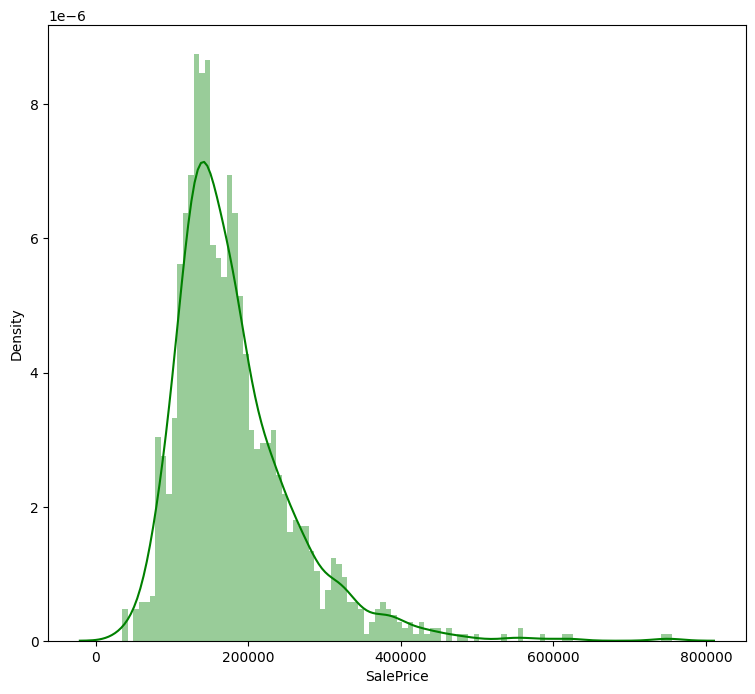

In [9]:
print(df_train['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_train['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [10]:
list(set(df_train.dtypes.tolist()))
df_num = df_train.select_dtypes(include = ['float64', 'int64']).drop('Id', axis=1)
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


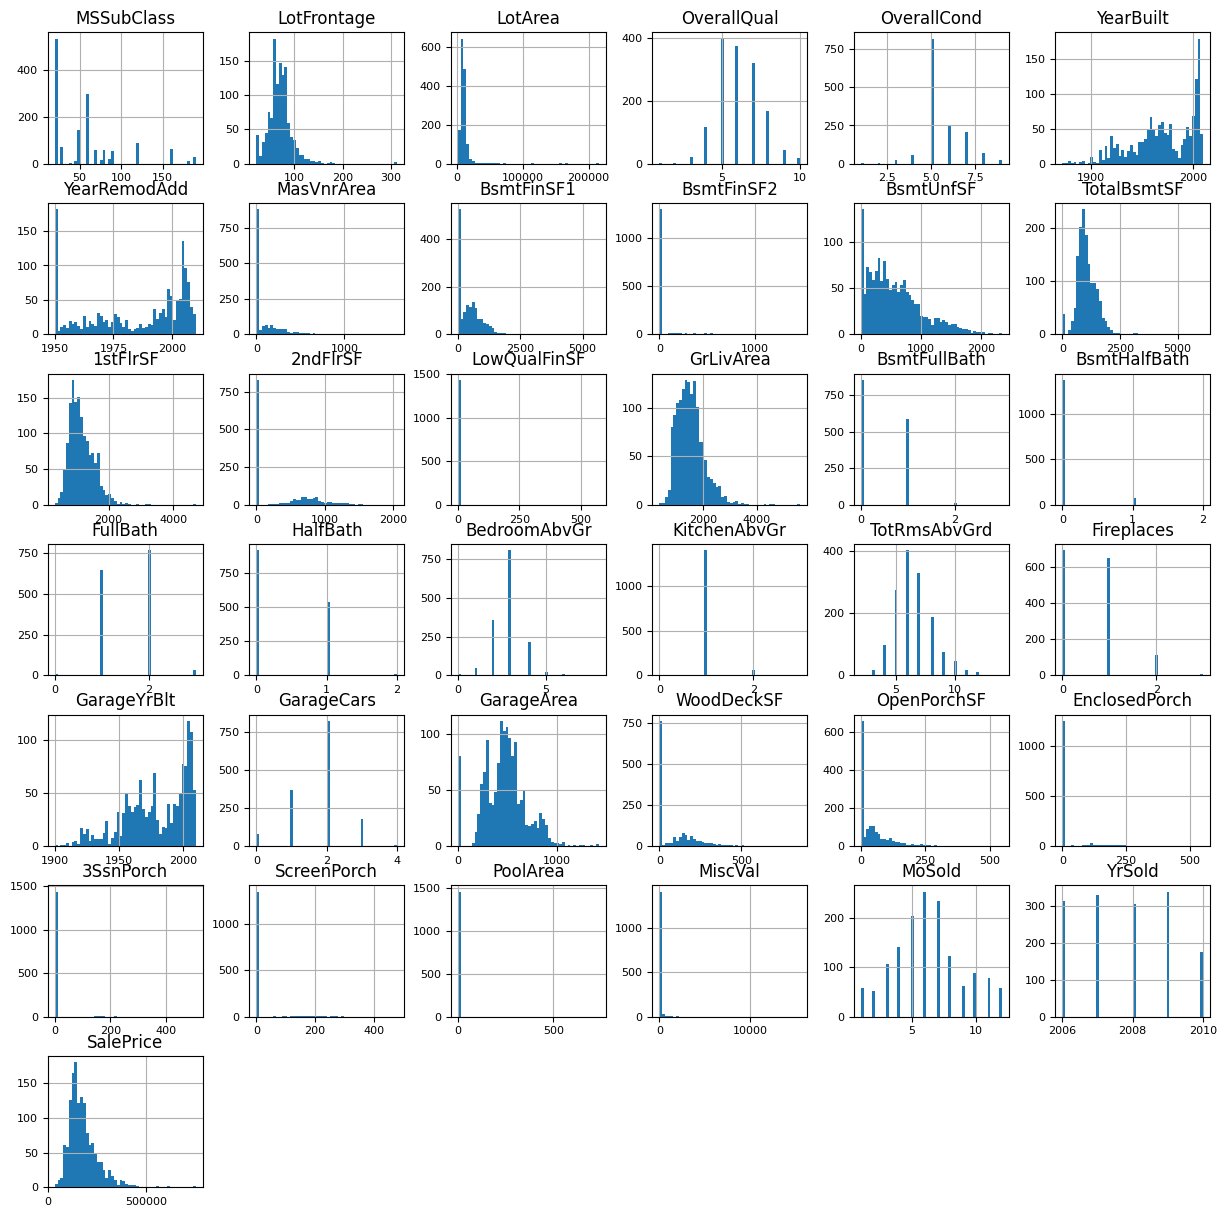

In [11]:
df_num.hist(figsize=(15, 15), bins=50, xlabelsize=8, ylabelsize=8);

In [12]:
missing_values = pd.DataFrame(df.isnull().mean().round(4).mul(100).sort_values(ascending=False))
missing_values.head(15)

,0
PoolQC,99.66
MiscFeature,96.40
Alley,93.22
Fence,80.44
MasVnrType,60.50
FireplaceQu,48.65
LotFrontage,16.65
GarageQual,5.45
GarageCond,5.45
GarageYrBlt,5.45


## Обработка категориальных фичей
Вася

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [14]:
df_cat = df.select_dtypes(include = ['object'])
df_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [15]:
## missing values in cat feautures

missing_values_cat = pd.DataFrame(df_cat.isnull().mean().round(4).mul(100).sort_values(ascending=False))
missing_values_cat.head(15)


## Заполнил все NaN 'Lack_F', так как в данном случае NaN у нас - это не пустое поле, а отсутствие признака
df_cat.fillna('Lack_F', inplace=True)

In [16]:
df_cat.nunique().sort_values(ascending=False)

Neighborhood     25
Exterior2nd      17
Exterior1st      16
SaleType         10
Condition1        9
Condition2        8
RoofMatl          8
Functional        8
HouseStyle        8
BsmtFinType2      7
BsmtFinType1      7
GarageType        7
Electrical        6
Foundation        6
Heating           6
FireplaceQu       6
GarageQual        6
GarageCond        6
MSZoning          6
SaleCondition     6
RoofStyle         6
ExterCond         5
BldgType          5
MiscFeature       5
Fence             5
LotConfig         5
KitchenQual       5
BsmtQual          5
HeatingQC         5
BsmtExposure      5
BsmtCond          5
MasVnrType        4
ExterQual         4
GarageFinish      4
LandContour       4
LotShape          4
PoolQC            4
Utilities         3
PavedDrive        3
Alley             3
LandSlope         3
CentralAir        2
Street            2
dtype: int64

In [17]:
selected_columns = df_cat.loc[:, df_cat.nunique() >= 5]

# Хочу заменить значения на 'other' у колонок с выбранным threshold. Далее можно будет подумать над выбором значения и подбирать для каждой колонки.
thresholds = selected_columns.apply(lambda x: x.count() * 0.05)

## итерируюсь по колонкам и заменяю значения меньше threshold на 'other'

for column, threshold in zip(selected_columns.columns, thresholds):
    counts = selected_columns[column].value_counts()
    to_replace = counts[counts < threshold].index
    selected_columns[column] = selected_columns[column].replace(to_replace, 'other')


## вставляем отобранные колонки в df_cat

df_cat[selected_columns.columns] = selected_columns


/var/folders/fx/mm163gs50sg284cn4dbq0dlh0000gn/T/ipykernel_89904/4024813601.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns[column] = selected_columns[column].replace(to_replace, 'other')
/var/folders/fx/mm163gs50sg284cn4dbq0dlh0000gn/T/ipykernel_89904/4024813601.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns[column] = selected_columns[column].replace(to_replace, 'other')
/var/folders/fx/mm163gs50sg284cn4dbq0dlh0000gn/T/ipykernel_89904/4024813601.py:11: SettingWi

In [18]:
df_cat.nunique().sort_values(ascending=False)

Neighborhood     9
BsmtFinType1     7
Exterior1st      6
Exterior2nd      6
GarageType       5
BsmtExposure     5
BsmtQual         4
PoolQC           4
GarageFinish     4
FireplaceQu      4
KitchenQual      4
HeatingQC        4
Foundation       4
ExterQual        4
MasVnrType       4
SaleCondition    4
HouseStyle       4
LotShape         4
LandContour      4
LotConfig        4
Electrical       3
RoofStyle        3
SaleType         3
Fence            3
Alley            3
PavedDrive       3
GarageCond       3
GarageQual       3
Utilities        3
MSZoning         3
LandSlope        3
Condition1       3
BldgType         3
ExterCond        3
CentralAir       2
Functional       2
Heating          2
BsmtFinType2     2
Condition2       2
BsmtCond         2
Street           2
MiscFeature      2
RoofMatl         2
dtype: int64

In [19]:
df_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Lack_F,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Lack_F,Lack_F,Lack_F,WD,Normal
1,RL,Pave,Lack_F,Reg,Lvl,AllPub,other,Gtl,other,Feedr,...,Attchd,RFn,TA,TA,Y,Lack_F,Lack_F,Lack_F,WD,Normal
2,RL,Pave,Lack_F,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,Lack_F,Lack_F,Lack_F,WD,Normal
3,RL,Pave,Lack_F,IR1,Lvl,AllPub,Corner,Gtl,other,Norm,...,Detchd,Unf,TA,TA,Y,Lack_F,Lack_F,Lack_F,WD,Abnorml
4,RL,Pave,Lack_F,IR1,Lvl,AllPub,other,Gtl,other,Norm,...,Attchd,RFn,TA,TA,Y,Lack_F,Lack_F,Lack_F,WD,Normal


In [20]:
## Попробую использовать target encoder для всех фичей

from category_encoders import TargetEncoder
te = TargetEncoder()

## Обучаем target encoding
te.fit(df_cat.loc[0:ind_test,:], y)

## Собираем df с target encoding
df_cat_te = pd.concat([te.transform(df_cat.loc[0:ind_test,:]), te.transform(te.transform(df_cat.loc[ind_train:,:]))], axis=0)


df_cat_te.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,12.024051,12.024639,12.024378,12.023146,12.023723,12.024108,12.024029,12.023721,12.024007,12.024064,...,12.024527,12.024084,12.024127,12.024309,12.024790,12.023226,12.024051,12.024145,12.024074,12.024420
std,0.098514,0.003311,0.044805,0.081549,0.043542,0.000470,0.042737,0.008485,0.153107,0.038322,...,0.162028,0.174253,0.099317,0.104193,0.084236,0.003784,0.051035,0.021197,0.094895,0.100058
min,11.692893,11.953506,11.689986,11.936094,11.813595,11.998983,12.001900,12.020565,11.703894,11.818794,...,11.493065,11.493065,11.493065,11.493065,11.578347,12.022115,11.850597,11.871328,11.865709,11.788846
25%,12.024051,12.024051,12.024051,11.936094,12.022694,12.024051,12.001900,12.020565,12.024051,12.024051,...,12.024051,12.024051,12.024051,12.024051,12.024051,12.022115,12.024051,12.024051,11.991061,12.005034
50%,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,...,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051
75%,12.085885,12.025522,12.037675,12.024051,12.024051,12.024183,12.024051,12.024051,12.055647,12.042916,...,12.160778,12.172672,12.068539,12.070483,12.059895,12.024051,12.058599,12.030112,12.024051,12.024051
max,12.085885,12.025522,12.037675,12.286332,12.248102,12.024183,12.249672,12.076286,12.617426,12.042916,...,12.374528,12.320811,12.068539,12.070483,12.059895,12.154581,12.058599,12.030112,12.459356,12.447465


In [21]:
## Заменяем в нашем df категориальные фичи на фичи, которые прошли encoding

df[df_cat_te.columns] = df_cat_te

In [22]:
df.shape

(2919, 80)

In [23]:
df.describe().round(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,2919.00,2919.00,2919.00,2433.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,...,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00
mean,1460.00,57.14,12.02,69.31,10168.11,12.02,12.02,12.02,12.02,12.02,...,16.06,2.25,12.02,12.02,12.02,50.83,6.21,2007.79,12.02,12.02
std,842.79,42.52,0.10,23.34,7887.00,0.00,0.04,0.08,0.04,0.00,...,56.18,35.66,0.00,0.05,0.02,567.40,2.71,1.31,0.09,0.10
min,1.00,20.00,11.69,21.00,1300.00,11.95,11.69,11.94,11.81,12.00,...,0.00,0.00,12.02,11.85,11.87,0.00,1.00,2006.00,11.87,11.79
25%,730.50,20.00,12.02,59.00,7478.00,12.02,12.02,11.94,12.02,12.02,...,0.00,0.00,12.02,12.02,12.02,0.00,4.00,2007.00,11.99,12.01
50%,1460.00,50.00,12.02,68.00,9453.00,12.02,12.02,12.02,12.02,12.02,...,0.00,0.00,12.02,12.02,12.02,0.00,6.00,2008.00,12.02,12.02
75%,2189.50,70.00,12.09,80.00,11570.00,12.03,12.04,12.02,12.02,12.02,...,0.00,0.00,12.02,12.06,12.03,0.00,8.00,2009.00,12.02,12.02
max,2919.00,190.00,12.09,313.00,215245.00,12.03,12.04,12.29,12.25,12.02,...,576.00,800.00,12.15,12.06,12.03,17000.00,12.00,2010.00,12.46,12.45


## Обработка числовых фичей 
Вика

In [65]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage']).mean()
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

df.shape

(2919, 80)

In [72]:
# df['LotFrontage'].value_counts()
df['MasVnrArea'].value_counts()
# df['GarageYrBlt'].value_counts()

MasVnrArea
0.000000      1738
102.201312      23
120.000000      15
176.000000      13
200.000000      13
              ... 
788.000000       1
796.000000       1
391.000000       1
604.000000       1
382.000000       1
Name: count, Length: 445, dtype: int64

In [59]:
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(0)
df['GarageArea'] = df['GarageArea'].fillna(0)
df['GarageCars'] = df['GarageCars'].fillna(0)
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(0)
df['BsmtFinSF2'] = df['BsmtFinSF2'].fillna(0)
df['BsmtUnfSF'] = df['BsmtUnfSF'].fillna(0)
df['TotalBsmtSF'] = df['TotalBsmtSF'].fillna(0)




,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,12.085885,69.305795,8450,12.025522,12.037675,11.936094,12.022694,12.024183,...,0,0,12.022115,12.058599,12.030112,0,2,2008,11.991061,12.005034
1,2,20,12.085885,69.305795,9600,12.025522,12.037675,11.936094,12.022694,12.024183,...,0,0,12.022115,12.058599,12.030112,0,5,2007,11.991061,12.005034
2,3,60,12.085885,69.305795,11250,12.025522,12.037675,12.163465,12.022694,12.024183,...,0,0,12.022115,12.058599,12.030112,0,9,2008,11.991061,12.005034
3,4,70,12.085885,69.305795,9550,12.025522,12.037675,12.163465,12.022694,12.024183,...,0,0,12.022115,12.058599,12.030112,0,2,2006,11.991061,11.788846
4,5,60,12.085885,69.305795,14260,12.025522,12.037675,12.163465,12.022694,12.024183,...,0,0,12.022115,12.058599,12.030112,0,12,2008,11.991061,12.005034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2915,160,12.024051,69.305795,1936,12.024051,12.024051,12.024051,12.024051,12.024051,...,0,0,12.024051,12.024051,12.024051,0,6,2006,12.024051,12.024051
2915,2916,160,12.024051,69.305795,1894,12.024051,12.024051,12.024051,12.024051,12.024051,...,0,0,12.024051,12.024051,12.024051,0,4,2006,12.024051,12.024051
2916,2917,20,12.024051,69.305795,20000,12.024051,12.024051,12.024051,12.024051,12.024051,...,0,0,12.024051,12.024051,12.024051,0,9,2006,12.024051,12.024051
2917,2918,85,12.024051,69.305795,10441,12.024051,12.024051,12.024051,12.024051,12.024051,...,0,0,12.024051,12.024051,12.024051,700,7,2006,12.024051,12.024051


In [70]:
df['BsmtHalfBath'].value_counts()

BsmtHalfBath
0.0    2742
1.0     171
2.0       4
Name: count, dtype: int64

## Подготовка к обучению модели

In [56]:
## Scaling of our data

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df_scaled = pd.DataFrame(ss.fit_transform(df.loc[:, df.columns != 'Id']), columns=df.columns[1:])
df_scaled.describe().round(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,2919.00,2919.00,2919.0,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,...,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00,2919.00
mean,0.00,0.00,0.0,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.87,-3.36,0.0,-1.12,-21.48,-7.46,-1.07,-4.83,-53.48,-0.52,...,-0.29,-0.06,-0.29,-3.40,-7.21,-0.09,-1.92,-1.36,-1.67,-2.35
25%,-0.87,0.00,0.0,-0.34,-0.18,-0.01,-1.07,-0.02,-0.12,-0.52,...,-0.29,-0.06,-0.29,-0.00,-0.00,-0.09,-0.82,-0.60,-0.35,-0.19
50%,-0.17,0.00,0.0,-0.09,-0.18,-0.01,0.01,0.01,-0.12,0.00,...,-0.29,-0.06,0.22,-0.00,-0.00,-0.09,-0.08,0.16,-0.00,-0.00
75%,0.30,0.63,0.0,0.18,0.27,0.30,0.01,0.01,0.16,0.00,...,-0.29,-0.06,0.22,0.68,0.28,-0.09,0.66,0.92,-0.00,-0.00
max,3.13,0.63,0.0,26.01,0.27,0.30,3.23,5.15,0.16,5.28,...,9.97,22.37,34.71,0.68,0.28,29.88,2.13,1.68,4.59,4.23


In [27]:
## если скейэлить только numeric

# df_numeric_scaled = pd.DataFrame(ss.fit_transform(df[df_num.drop('SalePrice', axis=1).columns]), 
#                                  columns = df_num.drop('SalePrice', axis=1).columns)

# df_scaled = pd.concat([df_numeric_scaled,df_cat_te], axis=1)

# df_scaled


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,0.067331,0.0,-0.217879,0.646183,-0.507284,1.046258,0.896833,0.525202,0.581145,-0.293025,...,12.160778,12.172672,12.068539,12.070483,12.059895,12.022115,12.058599,12.030112,11.991061,12.005034
1,-0.873616,0.0,-0.072044,-0.063185,2.188279,0.154764,-0.395604,-0.572250,1.178255,-0.293025,...,12.160778,12.172672,12.068539,12.070483,12.059895,12.022115,12.058599,12.030112,11.991061,12.005034
2,0.067331,0.0,0.137197,0.646183,-0.507284,0.980221,0.848965,0.334828,0.098189,-0.293025,...,12.160778,12.172672,12.068539,12.070483,12.059895,12.022115,12.058599,12.030112,11.991061,12.005034
3,0.302568,0.0,-0.078385,0.646183,-0.507284,-1.859351,-0.682812,-0.572250,-0.494529,-0.293025,...,11.765643,11.818974,12.068539,12.070483,12.059895,12.022115,12.058599,12.030112,11.991061,11.788846
4,0.067331,0.0,0.518903,1.355551,-0.507284,0.947203,0.753229,1.387486,0.469187,-0.293025,...,12.160778,12.172672,12.068539,12.070483,12.059895,12.022115,12.058599,12.030112,11.991061,12.005034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2.419700,0.0,-1.043937,-1.481920,1.289758,-0.043346,-0.682812,-0.572250,-0.968705,-0.293025,...,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051
2915,2.419700,0.0,-1.049263,-1.481920,-0.507284,-0.043346,-0.682812,-0.572250,-0.415500,-0.293025,...,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051
2916,-0.873616,0.0,1.246808,-0.772552,1.289758,-0.373528,0.561757,-0.572250,1.718287,-0.293025,...,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051
2917,0.655424,0.0,0.034605,-0.772552,-0.507284,0.683057,0.370284,-0.572250,-0.228904,-0.293025,...,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051,12.024051


In [57]:
### Разбиваем наш df на train and test

df_train = df_scaled.loc[0:ind_test,:] 
df_test = pd.concat([df['Id'][ind_train:], df_scaled.loc[ind_train:,:]], axis=1)

df_train.shape, df_test.shape

# df_test.head(5)


((1460, 79), (1459, 80))

In [29]:
from sklearn.model_selection import train_test_split

x = df_train

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
x_train.shape,  y_train.shape, x_valid.shape, y_valid.shape

((1168, 79), (1168,), (292, 79), (292,))

## Обучение модели

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [32]:
rf = RandomForestRegressor()
lr = LinearRegression()

In [33]:
rf.fit(x_train, y_train)
lr.fit(x_train, y_train)

LinearRegression()

In [34]:
from sklearn.metrics import mean_squared_error

mse_lr = mean_squared_error(y_valid, lr.predict(x_valid), squared=False)
mse_rf = mean_squared_error(y_valid, rf.predict(x_valid), squared=False)

mse_rf.round(3), mse_lr.round(3)

(0.148, 0.145)

In [35]:
y_pred_test = lr.predict(df_test.drop(['Id'], axis=1))

y_pred_test = np.exp(y_pred_test)

In [36]:
# submission_lr = pd.DataFrame({'Id':df_test['Id'], 'SalePrice': y_pred_test})
# submission_lr.to_csv('/Users/vasevooo/projects/house_prices/housing_kaggle/data/submission_lr.csv', index=False)

In [37]:
from catboost import CatBoostRegressor

cb = CatBoostRegressor(verbose = False, iterations = 50, l2_leaf_reg=3, learning_rate = 0.1, depth = 3, loss_function = 'RMSE')

cb.fit(x_train, y_train.ravel())


In [38]:
print("train acc:", mean_squared_error(y_train, cb.predict(x_train), squared=False))
print("valid acc:", mean_squared_error(y_valid, cb.predict(x_valid), squared=False))

train acc: 0.13112210894939053
valid acc: 0.15799866875206717


In [39]:
y_pred_test = cb.predict(df_test.drop(['Id'], axis=1))

y_pred_test = np.exp(y_pred_test)

In [40]:
submission_cb = pd.DataFrame({'Id':df_test['Id'], 'SalePrice': y_pred_test})
# submission_cb.to_csv('/Users/vasevooo/projects/house_prices/housing_kaggle/data/submission_cb.csv', index=False)

## Grid Search of Hyperparameters

In [41]:
from catboost import CatBoostRegressor, Pool


In [42]:
# cb_2 = CatBoostRegressor(verbose = False)

# grid = {'learning_rate': [0.01, 0.03, 0.1, 0.3],
#         'depth': [4, 6], 
#         'iterations': [100, 500],
#         'l2_leaf_reg': [1, 3],
#         'border_count': [32, 64]}

# grid_search_result = cb_2.grid_search(grid,
#                                        X=x_train,
#                                        y=y_train,
#                                        plot=True)

## Feature selection

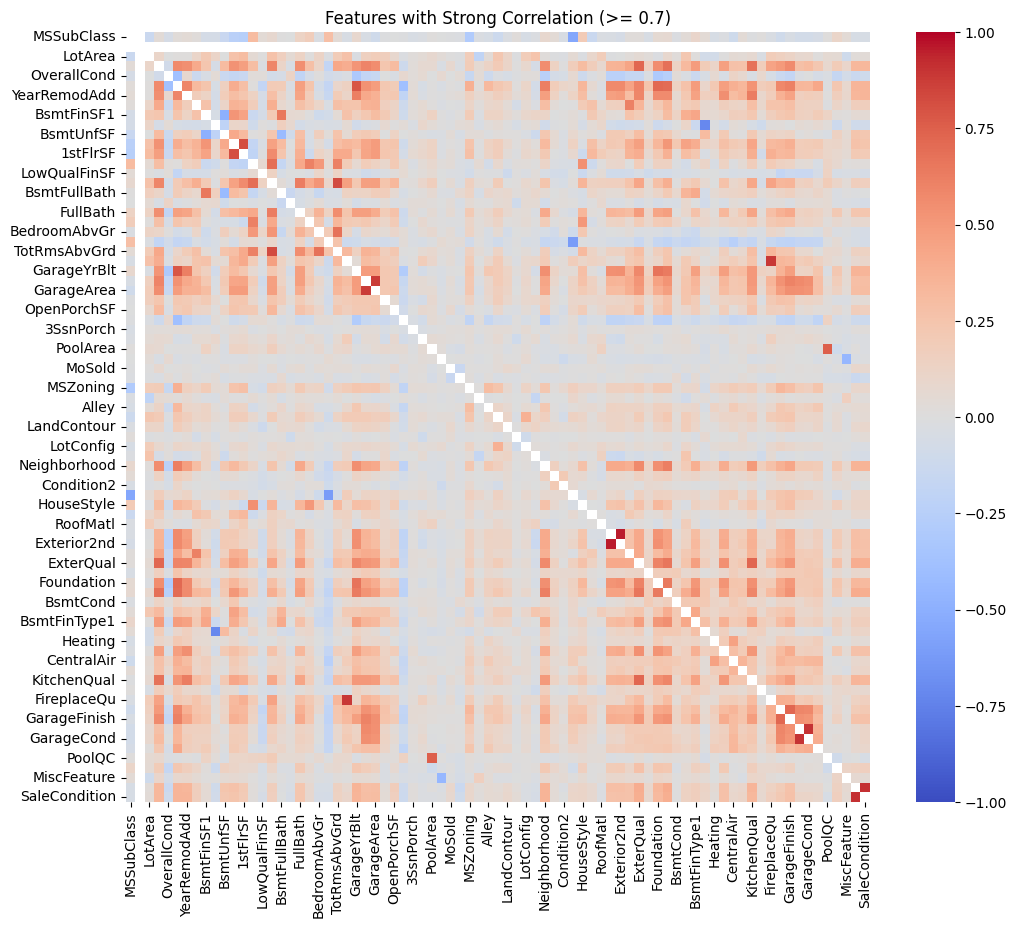

In [55]:
corr_matrix = df_train.corr()

# Filter the correlation matrix based on a threshold, e.g., 0.7
threshold = 0
strong_corr = corr_matrix[(np.abs(corr_matrix) >= threshold) & (np.abs(corr_matrix) != 1)]

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(strong_corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Features with Strong Correlation (>= 0.7)")
plt.show()

In [53]:
corr_matrix

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
MSSubClass,1.000000,-0.207054,NaN,-0.201730,-0.018291,-0.034771,-0.082493,-0.018324,0.015259,-0.036172,...,-0.049181,-0.003080,0.007412,0.072132,0.029406,-0.028867,-0.001231,-0.015028,-0.033033,-0.035173
MSZoning,-0.207054,1.000000,NaN,0.163302,0.009322,0.303257,0.247331,0.075544,-0.011537,0.118534,...,0.027120,0.024294,0.023793,0.018158,-0.012687,0.004798,0.010249,0.012067,0.093272,0.090510
LotFrontage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,-0.201730,0.163302,NaN,1.000000,-0.165750,0.033909,0.203874,0.101565,-0.003586,0.167229,...,0.054375,0.093708,0.042334,0.043984,-0.097049,0.069029,0.004156,-0.024234,0.021321,0.028920
Street,-0.018291,0.009322,NaN,-0.165750,1.000000,-0.011652,-0.007521,0.018470,0.020049,0.014130,...,-0.026066,0.005985,-0.035295,-0.030270,0.155882,-0.016129,0.009678,-0.014492,0.025455,0.019055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MiscVal,-0.028867,0.004798,NaN,0.069029,-0.016129,-0.002584,0.022849,0.003958,-0.000172,0.042124,...,0.007067,0.011921,0.011565,-0.018361,-0.276697,1.000000,0.007443,0.008445,-0.015157,-0.008992
MoSold,-0.001231,0.010249,NaN,0.004156,0.009678,0.004841,0.021811,0.055051,0.040932,-0.009817,...,0.028535,-0.042230,-0.028735,0.002949,-0.009861,0.007443,1.000000,-0.153895,0.062435,0.053508
YrSold,-0.015028,0.012067,NaN,-0.024234,-0.014492,0.015976,-0.024123,-0.007168,-0.014413,0.007469,...,-0.006634,-0.052816,-0.039629,-0.034057,-0.040820,0.008445,-0.153895,1.000000,-0.098549,-0.067761
SaleType,-0.033033,0.093272,NaN,0.021321,0.025455,0.054851,0.042624,0.082090,0.030707,-0.027413,...,-0.012843,0.009290,-0.001233,0.148381,0.065214,-0.015157,0.062435,-0.098549,1.000000,0.906827


In [60]:
df_train['LotFrontage']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1455    0.0
1456    0.0
1457    0.0
1458    0.0
1459    0.0
Name: LotFrontage, Length: 1460, dtype: float64